In [1]:
from sklearn.linear_model import LinearRegression 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
sns.set()

error value:
0       0.437342
1       0.783127
2       0.233520
3       0.221817
4       0.221817
          ...   
4893   -0.172579
4894   -0.634110
4895    0.658079
4896    0.428706
4897   -0.347343
Name: quality, Length: 4898, dtype: float64

rmse value:
0.7504359153109986

coeffient value:
[ 6.55199614e-02 -1.86317709e+00  2.20902007e-02  8.14828026e-02
 -2.47276537e-01  3.73276519e-03 -2.85747419e-04 -1.50284181e+02
  6.86343742e-01  6.31476473e-01  1.93475697e-01]

r score:
0.28187036413328626


(array([   6.,    9.,   47.,  230., 1278., 1804., 1115.,  326.,   68.,
          15.]),
 array([-3.83476027, -3.13985455, -2.44494882, -1.7500431 , -1.05513737,
        -0.36023165,  0.33467408,  1.0295798 ,  1.72448553,  2.41939125,
         3.11429698]),
 <a list of 10 Patch objects>)

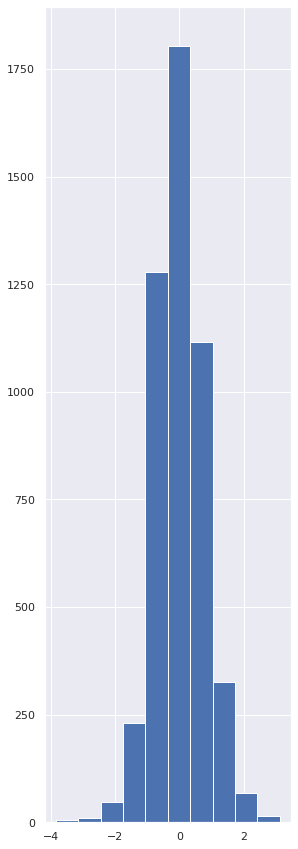

In [45]:
white = pd.read_csv("/home/hl46161/Downloads/winequality-white.csv",sep=";")
white.head()
#white["category"] = "white"
#white.head()
lr = LinearRegression()
quality = white["quality"]
white_1 = white.drop(columns = ["quality"])
fit_white = lr.fit(white_1,quality)

#correlation = white_1.corr()["quality"]
#white_1
quality_pre = fit_white.predict(white_1)
error = quality - quality_pre
sse = np.sum(error**2)
rmse = np.sqrt(sse/(len(quality)))
print("error value:")
print(error)
print("\n"+"rmse value:")
print(str(rmse))
print("\n"+"coeffient value:")
print(str(fit_white.coef_))
print("\n"+"r score:")
print(str(lr.score(white_1,quality)))
f = plt.figure(figsize=(15,15))
ax1 = f.add_subplot(131)
ax1.hist(error)

error value:
0      -0.032850
1      -0.137880
2      -0.209895
3       0.306142
4      -0.032850
          ...   
1594   -0.529771
1595    0.038387
1596    0.056957
1597   -0.470756
1598   -0.008196
Name: quality, Length: 1599, dtype: float64

rmse value:
0.6455750670692045

coeffient value:
[ 2.49905527e-02 -1.08359026e+00 -1.82563948e-01  1.63312698e-02
 -1.87422516e+00  4.36133331e-03 -3.26457970e-03 -1.78811638e+01
 -4.13653144e-01  9.16334413e-01  2.76197699e-01]

r score:
0.36055170303868833


(array([  4.,  13.,  29.,  98., 303., 523., 347., 212.,  55.,  15.]),
 array([-2.6891071 , -2.21769885, -1.74629061, -1.27488236, -0.80347411,
        -0.33206586,  0.13934239,  0.61075064,  1.08215889,  1.55356713,
         2.02497538]),
 <a list of 10 Patch objects>)

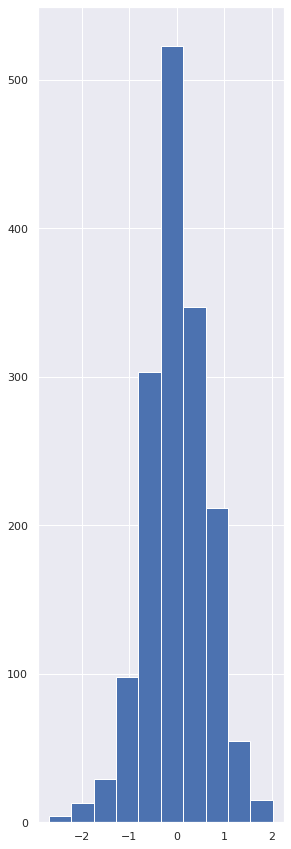

In [46]:
red = pd.read_csv("/home/hl46161/Downloads/winequality-red.csv",sep=";")
red.head()
#red["category"] = "red"
#red.head()
lr = LinearRegression()
quality = red["quality"]
red_1 = red.drop(columns = ["quality"])
fit_red = lr.fit(red_1,quality)
#fit_red.coef_
f = plt.figure(figsize=(15,15))
quality_pre_red = fit_red.predict(red_1)
error_red = quality - quality_pre_red
sse = np.sum(error_red**2)
rmse = np.sqrt(sse/(len(quality)))
print("error value:")
print(error_red)
print("\n"+"rmse value:")
print(str(rmse))
print("\n"+"coeffient value:")
print(str(fit_red.coef_))
print("\n"+"r score:")
print(str(lr.score(red_1,quality)))
ax2 = f.add_subplot(132)
ax2.hist(error_red)

error value:
0       0.443191
1       0.718689
2       0.120368
3       0.302010
4       0.302010
          ...   
1594   -0.580686
1595   -0.015123
1596    0.081896
1597   -0.544644
1598   -0.047863
Name: quality, Length: 6497, dtype: float64

rmse value:
0.7346532973303375

coeffient value:
[ 6.76839156e-02 -1.32789221e+00 -1.09656648e-01  4.35587507e-02
 -4.83713531e-01  5.96988830e-03 -2.48129841e-03 -5.49669422e+01
  4.39296072e-01  7.68251760e-01  2.67030009e-01]

r score:
0.2921368850402044


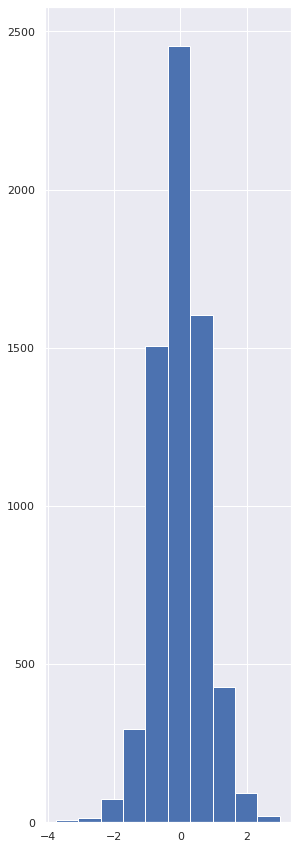

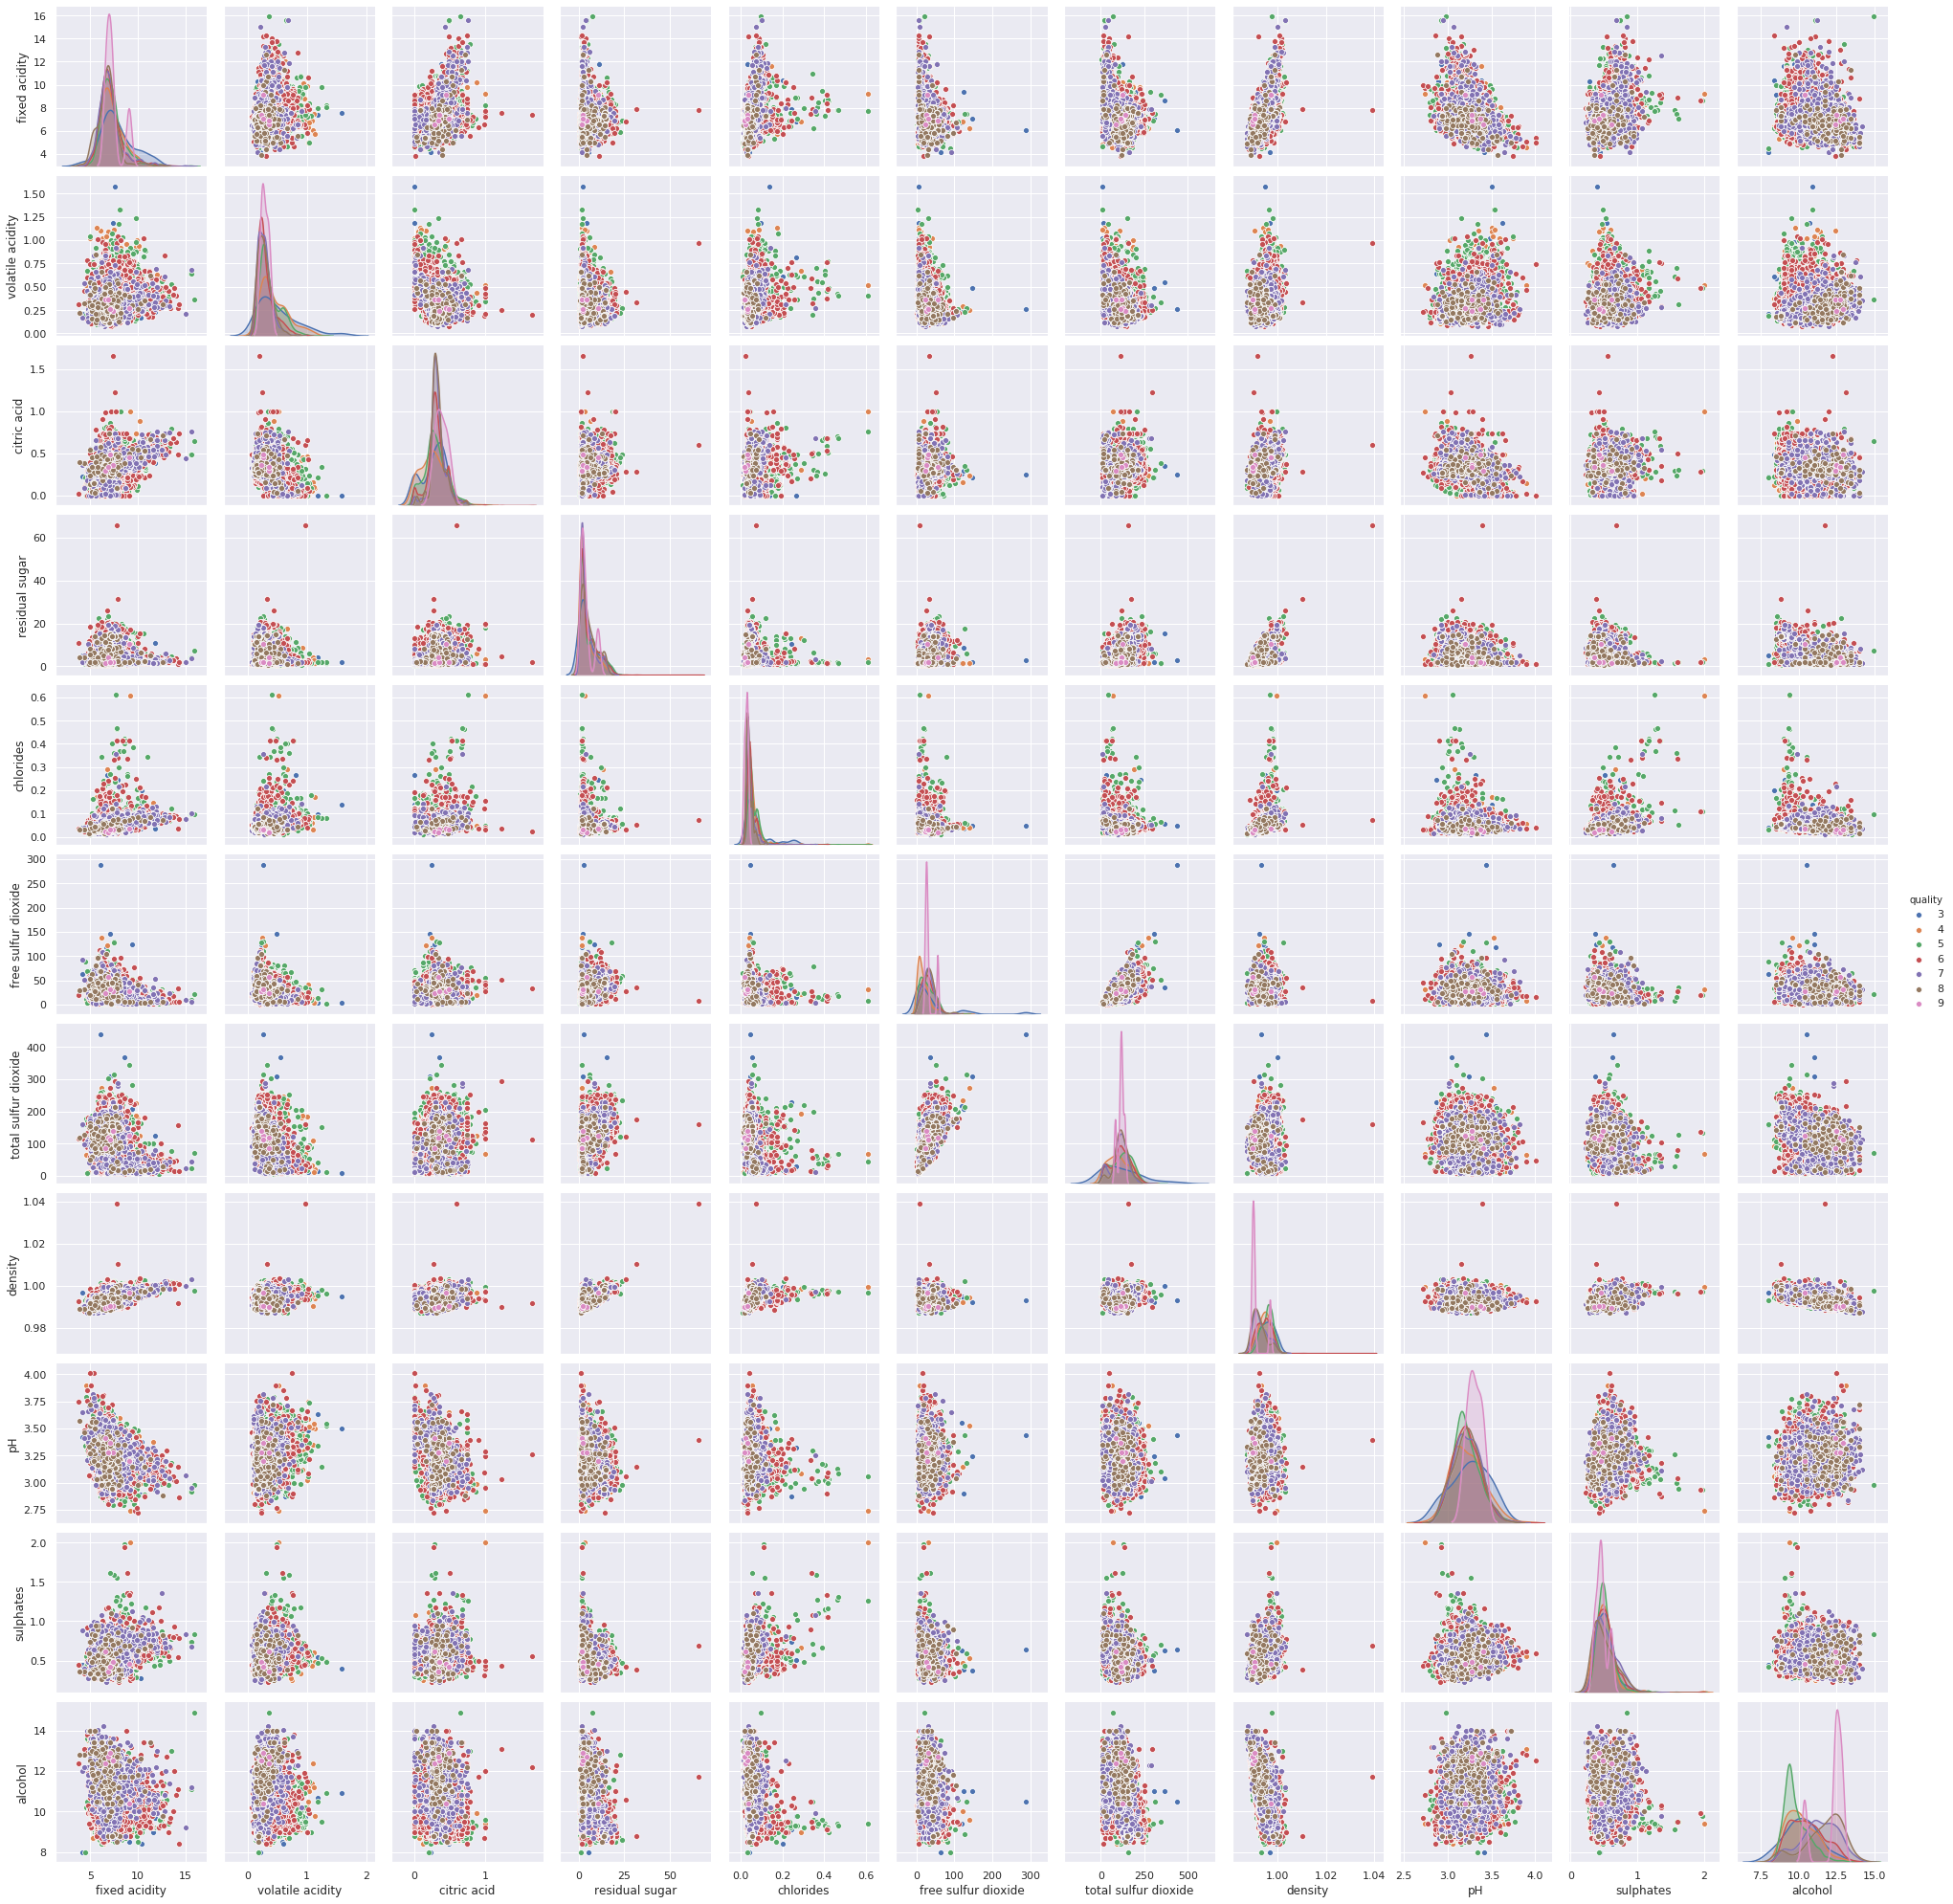

In [47]:
white["category"] = "white"
red["category"] = "red"
combine_data = pd.concat([white,red])
combine_data
quality = combine_data["quality"]
combine_1 = combine_data.drop(columns = ["quality","category"])
fit_combine = (lr.fit(combine_1,quality))
quality_combine_pre = fit_combine.predict(combine_1)
error_combine = quality - quality_combine_pre
sse = np.sum(error_combine**2)
rmse = np.sqrt(sse/(len(quality)))
f = plt.figure(figsize=(15,15))
ax3 = f.add_subplot(133)
ax3.hist(error_combine)
print("error value:")
print(error_combine)
print("\n"+"rmse value:")
print(str(rmse))
print("\n"+"coeffient value:")
print(str(fit_combine.coef_))
print("\n"+"r score:")
print(str(lr.score(combine_1,quality)))
sns.pairplot(data = combine_data,hue = 'quality')


This is coeffient and intercept:
[[ 0.01988257 -0.00975411  0.08838822]],[-1.86233569]

This is confusion matrix:
[[215  10]
 [ 67  14]]

This is incorrect value:


,Age,year,# of node,survival
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1
34,39,66,0,2
44,41,64,0,2
...,...,...,...,...
287,70,66,14,1
293,72,63,0,2
299,74,65,3,2
304,78,65,1,2



This is classification report:
              precision    recall  f1-score   support

           1       0.76      0.96      0.85       225
           2       0.58      0.17      0.27        81

    accuracy                           0.75       306
   macro avg       0.67      0.56      0.56       306
weighted avg       0.72      0.75      0.69       306



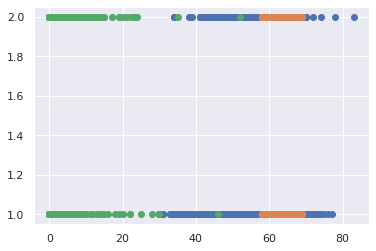

In [58]:
header_list = ["Age","year","# of node","survival"]
haberman = pd.read_csv("/home/hl46161/Downloads/haberman.data",sep=",", names = header_list)
haberman.head()
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
haberman_1 = haberman.drop(columns=["survival"])
y = haberman["survival"]
#logreg.fit(haberman_1,)
log_reg = LogisticRegression(solver = "lbfgs")
fit = log_reg.fit(haberman_1,y)
print("This is coeffient and intercept:")
print(f"{fit.coef_},{fit.intercept_}")
y_pred = log_reg.predict(haberman_1)
print("\n"+"This is confusion matrix:")
print(confusion_matrix(y,y_pred))
incorrect = haberman[y_pred != y]
#plt.plot(haberman.haberman_1,haberman.y)
print("\n"+"This is incorrect value:")
display(incorrect)
print("\n"+"This is classification report:")
print(classification_report(y,y_pred))
plt.plot(haberman_1,y,"o")




